In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# What is the effect

If there is strong multicoll.. Betas will change drastically for a small change in input variable.
Inflated Betas.

In [2]:
arr = np.array([[1,1,1,1,1,1,1,1,1,1],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[1.2, 2.1, 3.1, 4.1, 5.0, 6.0, 7.0, 8.0, 9.1, 10.2]]).T
arr # col2 and col3 are has strong multicoll..

array([[ 1. ,  1. ,  1.2],
       [ 1. ,  2. ,  2.1],
       [ 1. ,  3. ,  3.1],
       [ 1. ,  4. ,  4.1],
       [ 1. ,  5. ,  5. ],
       [ 1. ,  6. ,  6. ],
       [ 1. ,  7. ,  7. ],
       [ 1. ,  8. ,  8. ],
       [ 1. ,  9. ,  9.1],
       [ 1. , 10. , 10.2]])

In [4]:
np.linalg.inv(np.dot(arr.T,arr))

array([[  0.67713004,   1.89686099,  -1.97309417],
       [  1.89686099,  18.3309417 , -18.40807175],
       [ -1.97309417, -18.40807175,  18.49775785]])

In [5]:
arr = np.array([[1,1,1,1,1,1,1,1,1,1],[1.1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[1.2, 2.1, 3.1, 4.1, 5.0, 6.0, 7.0, 8.0, 9.1, 10.2]]).T # Just changed 1 by 1.1 in col2

In [6]:
np.linalg.inv(np.dot(arr.T,arr)) # drastic change is inverse matrix. 18 become 24.

array([[  0.579715  ,   1.55493605,  -1.62140011],
       [  1.55493605,  24.45470752, -24.42659041],
       [ -1.62140011, -24.42659041,  24.41073715]])

In [7]:
# without multicoll..
arr = np.array([[1,1,1,1,1,1,1,1,1,1],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[2.4, 0.7, 4.3, 3.5, 1.6, 5.1, 6.9, 7.5, 8.1, 9.8]]).T
np.linalg.inv(np.dot(arr.T,arr)) # here betas will be small

array([[ 0.46684896, -0.06359872, -0.00341803],
       [-0.06359872,  0.06375331, -0.05752395],
       [-0.00341803, -0.05752395,  0.06408812]])

In [10]:
# without multicoll..
# no drastic change in betas for small change in input
arr1 = np.array([[1,1,1,1,1,1,1,1,1,1],[1.1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[2.4, 0.7, 4.3, 3.5, 1.6, 5.1, 6.9, 7.5, 8.1, 9.8]]).T
np.linalg.inv(np.dot(arr1.T,arr1))

array([[ 0.47202303, -0.06705466, -0.00051139],
       [-0.06705466,  0.06552638, -0.05891698],
       [-0.00051139, -0.05891698,  0.06515911]])

# How to detect

### Condition Number

In [12]:
A = np.array([[1, 2],
              [3, 4]])

condition_number = np.linalg.cond(A)
print("Condition Number:", condition_number)

Condition Number: 14.933034373659268


In [74]:
# If condition number >30 then there is multicoll..


## Correlation

In [16]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv',index_col=0)

df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [17]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

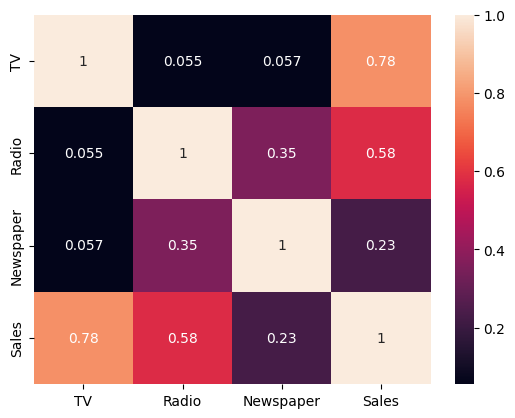

In [19]:
sns.heatmap(df.corr(),annot=True)

## VIF

In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv',index_col=0)

df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(3):
    vif.append(variance_inflation_factor(df.iloc[:,0:3], i))

In [63]:
vif

[np.float64(2.486771835198193),
 np.float64(3.285462100162896),
 np.float64(3.0552445106573853)]

In [64]:
pd.DataFrame({'vif': vif}, index=df.columns[0:3]).T

,TV,Radio,Newspaper
vif,2.486772,3.285462,3.055245


In [77]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_regression

# Generate a synthetic dataset with multicollinearity
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=3, noise=0.5, random_state=42)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=100)  # Introduce multicollinearity between columns 0 and 1

# Convert data to a pandas DataFrame
data = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
data['y'] = y

data.corr()

,X1,X2,X3,y
X1,1.000000,0.882948,-0.048636,0.148108
X2,0.882948,1.000000,-0.054696,0.165352
X3,-0.048636,-0.054696,1.000000,0.071536
y,0.148108,0.165352,0.071536,1.000000


<Axes: >

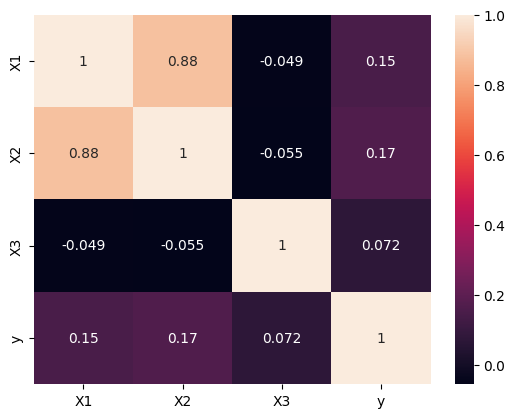

In [78]:
sns.heatmap(data.corr(),annot=True)

In [79]:
np.linalg.cond(data)

np.float64(272.51225036769426)

# How to remove multicollinearity

In [80]:
data.head()

,X1,X2,X3,y
0,-0.792521,-0.544164,-0.114736,13.480582
1,0.280992,0.211860,-0.622700,-18.902685
2,0.791032,1.114876,-0.909387,110.450979
3,0.625667,1.387182,-0.857158,-78.162124
4,-0.342715,-0.459791,-0.802277,-35.728094


In [81]:
sm.add_constant(data[['X1', 'X2', 'X3']])

,const,X1,X2,X3
0,1.0,-0.792521,-0.544164,-0.114736
1,1.0,0.280992,0.211860,-0.622700
2,1.0,0.791032,1.114876,-0.909387
3,1.0,0.625667,1.387182,-0.857158
4,1.0,-0.342715,-0.459791,-0.802277
...,...,...,...,...
95,1.0,0.651391,-0.080366,-0.315269
96,1.0,1.586017,1.734077,-1.237815
97,1.0,0.010233,0.140761,-0.981509
98,1.0,-0.234587,-0.232030,-1.415371


## We can remove column or combine columns with multicoll..

In [85]:
# Add a constant term to the predictor variables
data_with_constant_all = sm.add_constant(data[['X1', 'X2', 'X3']])
data_with_constant_reduced = sm.add_constant(data[['X1', 'X3']])

# Create and fit an OLS model using all three predictor variables
model_all = sm.OLS(data['y'], data_with_constant_all).fit()

# Print the summary for the model with all predictors
print("Regression summary for the model with all predictors:")
print(model_all.summary())
print('\n\n\n')



# Create and fit an OLS model using only X1 and X3 (removing the highly correlated variable X2)
model_reduced = sm.OLS(data['y'], data_with_constant_reduced).fit()

# Print the summary for the model with reduced predictors (X1 and X3)
print("\nRegression summary for the model with reduced predictors (X1 and X3):")
print(model_reduced.summary())

Regression summary for the model with all predictors:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.122
Date:                Sat, 24 May 2025   Prob (F-statistic):              0.344
Time:                        15:55:09   Log-Likelihood:                -581.96
No. Observations:                 100   AIC:                             1172.
Df Residuals:                      96   BIC:                             1182.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

Here, condition number and standard error get reduced

In [72]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_regression

# Generate a synthetic dataset with multicollinearity
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=3, noise=0.5, random_state=42)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=100)  # Introduce multicollinearity between columns 0 and 1

# Convert data to a pandas DataFrame
data = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
data['y'] = y

# Calculate correlation matrix
corr_matrix = data.corr()
print("Correlation matrix:\n", corr_matrix)

# Combine the correlated variables X1 and X2 by taking their average
data['X1_X2_combined'] = (data['X1'] + data['X2']) / 2

# Add a constant term to the predictor variables
data_with_constant_all = sm.add_constant(data[['X1', 'X2', 'X3']])
data_with_constant_combined = sm.add_constant(data[['X1_X2_combined', 'X3']])

# Create and fit an OLS model using all three predictor variables
model_all = sm.OLS(data['y'], data_with_constant_all).fit()

# Print the summary for the model with all predictors
print("Regression summary for the model with all predictors:")
print(model_all.summary())

# Create and fit an OLS model using the combined variable and X3
model_combined = sm.OLS(data['y'], data_with_constant_combined).fit()

# Print the summary for the model with combined predictors (X1_X2_combined and X3)
print("\nRegression summary for the model with combined predictors (X1_X2_combined and X3):")
print(model_combined.summary())


Correlation matrix:
           X1        X2        X3         y
X1  1.000000  0.882948 -0.048636  0.148108
X2  0.882948  1.000000 -0.054696  0.165352
X3 -0.048636 -0.054696  1.000000  0.071536
y   0.148108  0.165352  0.071536  1.000000
Regression summary for the model with all predictors:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.122
Date:                Sat, 24 May 2025   Prob (F-statistic):              0.344
Time:                        15:38:18   Log-Likelihood:                -581.96
No. Observations:                 100   AIC:                             1172.
Df Residuals:                      96   BIC:                             1182.
Df Model:                           3                                         

# Partial least regression


In [70]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression

# Generate a synthetic dataset with multicollinearity
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=3, noise=0.5, random_state=42)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=100)  # Introduce multicollinearity between columns 0 and 1

# Convert data to a pandas DataFrame
data = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
data['y'] = y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['X1', 'X2', 'X3']], data['y'], test_size=0.2, random_state=42)

# Create a PLS model with 2 components
pls_model = PLSRegression(n_components=2)

# Fit the PLS model using the training data
pls_model.fit(X_train, y_train)

# Predict the output using the test data
y_pred = pls_model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error of PLS model:", mse)


Mean squared error of PLS model: 7359.987203343638


## Demonstration on whether Multicolinearity affect prediction or not?

Coefficients: [ 7.82975574 -0.35506105]
Intercept: 0.05538294242873539
Predictions: [ -8.25677018   2.25780167  -5.23098428  -4.92651182   2.97959446
   2.70531829  11.16972937   3.30759815 -10.94470512   1.68484423
   3.82928598  14.13943351   9.49933304  -3.36890348  -1.51832659
  -4.23115591  -4.78889462  -0.68215734   0.10740839  13.66402891]
Actual values: [ -9.18480789   1.89862658  -6.15211091  -4.64957931   2.32888989
   3.49898934  10.15840282   3.02663273 -12.17106152  -0.19450888
   4.45283699  13.87072588   7.54389661  -2.21001374  -1.37663505
  -3.17231328  -3.345748    -1.00537557   0.07855777  12.6486582 ]
R-squared score: 0.9780759660909195
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1449.
Date:              

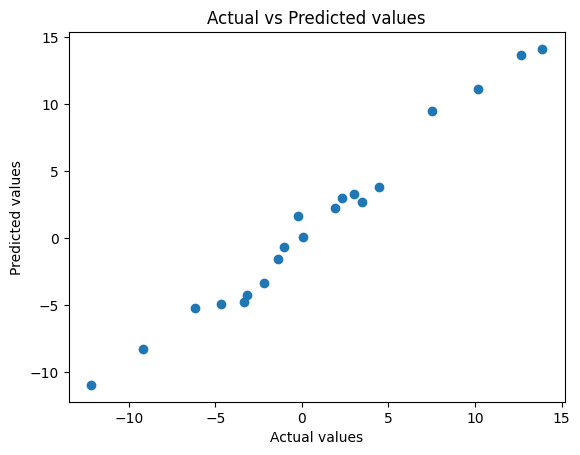

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Seed for reproducibility
np.random.seed(19)

# Generate synthetic data
n_samples = 100
X1 = np.random.normal(0, 1, n_samples)
X2 = 2 * X1 + np.random.normal(0, 0.1, n_samples)  # X2 highly correlated with X1
y = 3 * X1 + 2 * X2 + np.random.normal(0, 1, n_samples)

# Create a DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})

# Split the data
X = data[['X1', 'X2']]
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Display the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Display the predictions
print("Predictions:", y_pred)

# Display actual values
print("Actual values:", y_test.values)

# Display the R-squared score
print("R-squared score:", model.score(X_test, y_test))

# Use statsmodels for more detailed statistics
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

# Visualize the predictions
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values")
plt.show()

Coefficients: [7.11440157]
Intercept: 0.060390593241332044
Predictions: [ -8.28250771   2.2515214   -5.33172505  -4.93303808   3.01629575
   2.72715527  11.14833676   3.27780362 -10.95513134   1.63269655
   3.80636669  14.1355849    9.50421933  -3.37808444  -1.49696913
  -4.23165265  -4.7852587   -0.803173     0.05401461  13.70186201]
Actual values: [ -9.18480789   1.89862658  -6.15211091  -4.64957931   2.32888989
   3.49898934  10.15840282   3.02663273 -12.17106152  -0.19450888
   4.45283699  13.87072588   7.54389661  -2.21001374  -1.37663505
  -3.17231328  -3.345748    -1.00537557   0.07855777  12.6486582 ]
R-squared score: 0.9785569288486123
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     2932.
Date:                Sat, 24 Ma

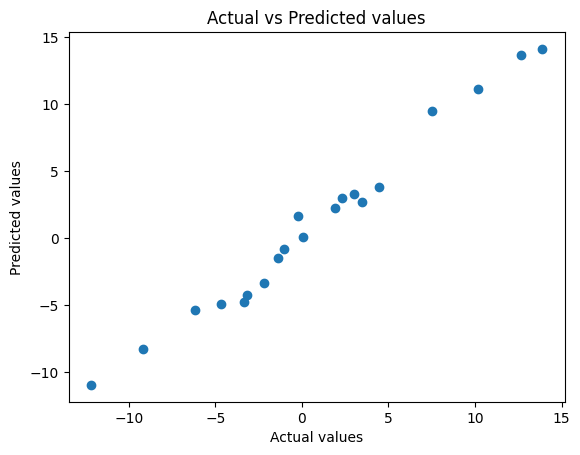

In [88]:
# Split the data
X = data[['X1']] # Removed X2 from our data
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Using random_state same to get same split

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Display the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Display the predictions
print("Predictions:", y_pred)

# Display actual values
print("Actual values:", y_test.values)

# Display the R-squared score
print("R-squared score:", model.score(X_test, y_test))

# Use statsmodels for more detailed statistics
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

# Visualize the predictions
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values")
plt.show()

The results you provided show how multicollinearity affects the standard errors of the regression coefficients but does not significantly impact the model's predictive power.

### Explanation:

1. **With Multicollinearity (X1 and X2)**:
    - **Coefficients**: `[ 7.82975574, -0.35506105]`
    - **Intercept**: `0.05538294242873539`
    - **R-squared score**: `0.9780759660909195`
    - **OLS Regression Results**:
        - Large standard errors for the coefficients (`X1: 2.255`, `X2: 1.117`).
        - High `R-squared` value indicating good fit.

2. **Without Multicollinearity (only X1)**:
    - **Coefficients**: `[7.11440157]`
    - **Intercept**: `0.060390593241332044`
    - **R-squared score**: `0.9785569288486123`
    - **OLS Regression Results**:
        - Smaller standard error for the coefficient (`X1: 0.131`).
        - High `R-squared` value indicating good fit.

### Interpretation:

- **Predictions**: The predictions remain accurate and close to the actual values in both cases. This demonstrates that multicollinearity does not significantly affect the model's ability to make predictions.

- **Standard Errors**: When multicollinearity is present, the standard errors of the coefficients are inflated. This makes it difficult to determine the individual effect of each predictor. However, this does not degrade the model's predictive performance, as seen from the similar R-squared scores and prediction accuracy.

